# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wkey

response = requests.get(url)

weather_json = response.json()

pprint(weather_json)

{'cod': '400', 'message': 'Nothing to geocode'}


In [15]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=katsuura
Processing Record 2 | Chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=chokurdakh
Processing Record 3 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=bredasdorp
Processing Record 4 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=grindavik
Processing Record 5 | Santiago de Cao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=santiago de cao
City not found. Skipping...
Processing Record 6 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=jamestown
Processing Record 7 | Mar del P

Processing Record 56 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=muros
Processing Record 57 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=tiksi
Processing Record 58 | Palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=palana
Processing Record 59 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=kapaa
Processing Record 60 | Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=port elizabeth
Processing Record 61 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=puerto ayora
Processing Record 62 | Sept-Iles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=se

Processing Record 112 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=tuktoyaktuk
Processing Record 113 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=tuatapere
Processing Record 114 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=vila franca do campo
Processing Record 115 | Mocuba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=mocuba
Processing Record 116 | Codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=codrington
Processing Record 117 | Vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=vestmannaeyjar
Processing Record 118 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Im

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=maningrida
Processing Record 167 | Huarmey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=huarmey
Processing Record 168 | Cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=cidreira
City not found. Skipping...
Processing Record 169 | Aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=aklavik
Processing Record 170 | Caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=caravelas
Processing Record 171 | Garbolovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=garbolovo
Processing Record 172 | Pacific Grove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d02232214

Processing Record 221 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=tasiilaq
Processing Record 222 | Arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=arlit
Processing Record 223 | Parnamirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=parnamirim
Processing Record 224 | Melfi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=melfi
Processing Record 225 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=zhigansk
Processing Record 226 | Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=jumla
Processing Record 227 | Rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=rawson
Pro

Processing Record 277 | Constantine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=constantine
Processing Record 278 | Manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=manokwari
Processing Record 279 | Camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=camacha
Processing Record 280 | Pedasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=pedasi
Processing Record 281 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=mogadishu
Processing Record 282 | Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=naze
Processing Record 283 | Oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266

Processing Record 333 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=auki
Processing Record 334 | Svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=svetlogorsk
Processing Record 335 | Qinzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=qinzhou
Processing Record 336 | Cotacachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=cotacachi
Processing Record 337 | Viransehir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=viransehir
Processing Record 338 | Poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=poum
Processing Record 339 | Metlaltoyuca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d26

Processing Record 389 | Kosonsoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=kosonsoy
Processing Record 390 | Tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=tezu
Processing Record 391 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=moose factory
Processing Record 392 | Colquechaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=colquechaca
Processing Record 393 | Lawrenceburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=lawrenceburg
City not found. Skipping...
Processing Record 394 | Peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=peniche
Processing Record 395 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imp

Processing Record 445 | Ciudad Bolivar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=ciudad bolivar
Processing Record 446 | Utete
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=utete
City not found. Skipping...
Processing Record 447 | Uchiza
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=uchiza
Processing Record 448 | Yatou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=yatou
City not found. Skipping...
Processing Record 449 | Burgeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=burgeo
Processing Record 450 | Mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=mandalgovi
Processing Record 451 | Udachnyy
http://api.openweathermap.org/data/2.5/weathe

Processing Record 501 | Kayerkan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=kayerkan
Processing Record 502 | Apt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=apt
City not found. Skipping...
Processing Record 503 | Alausi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=alausi
Processing Record 504 | Kamakwie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=kamakwie
Processing Record 505 | Kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=kiama
Processing Record 506 | Lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f6d022322143d266&q=lavrentiya
Processing Record 507 | Lewiston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2c2658d70d4fa30f

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [19]:
# Save data frame to CSV
weather_data.to_csv('../csv_file/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Katsuura,20,JP,1573067117,81,33.93,134.50,50.00,12.75
1,Chokurdakh,100,RU,1573067119,95,70.62,147.90,4.01,5.37
2,Bredasdorp,58,ZA,1573067120,67,-34.53,20.04,60.01,17.22
3,Grindavik,100,IS,1573067121,60,63.84,-22.43,37.40,12.75
4,Santiago de Cao,20,PE,1573067122,72,-7.96,-79.24,68.00,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

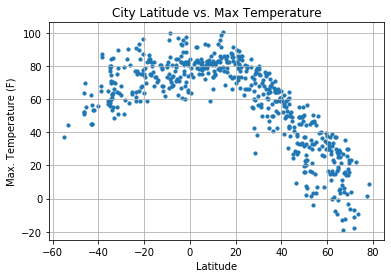

In [21]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../graphs/Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

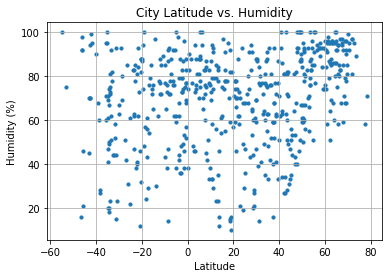

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../graphs/Lat_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

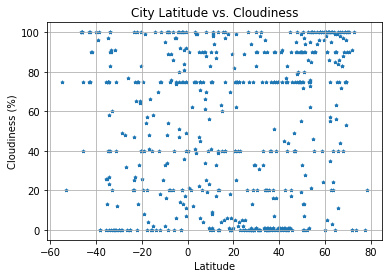

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="*", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../graphs/Lat_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

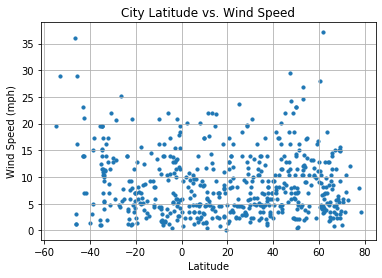

In [25]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../graphs/Lat_vs_WindSpeed.png")

# Show plot
plt.show()